# Activity 1. Familiarization with discrete FFT

In [1]:
import numpy as np
from numpy.fft import ifft2, fft2,fftshift
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy as sc
from scipy import ndimage
from matplotlib.pyplot import imshow, imread
from matplotlib import rcParams

rcParams['text.usetex'] = True

1. Create a 128x128 image of a white circle, centered and with the background black.

In [2]:
def make_circle(ratio):
    circle_size = 128
    circle = np.zeros((circle_size,circle_size))

    for i in range(circle_size):
        for j in range(circle_size):
            if np.sqrt((circle_size/2 - i)**2 + (circle_size/2 - j)**2) <= (circle_size)//ratio:
                circle[i,j] = 1
    return circle

In [3]:
circle = make_circle(2)

2. Open the image in Scilab using imread() and if the image variable is a 128 x 128 x 3 matrix convert to grayscale using RGB2Gray().

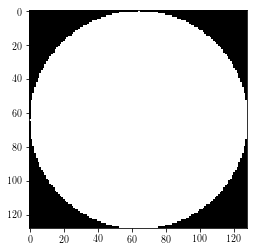

In [4]:
plt.imshow(circle, cmap='gray')

3. Apply fft2() on the image and compute the intensity values using abs(). Display the output using imshow().

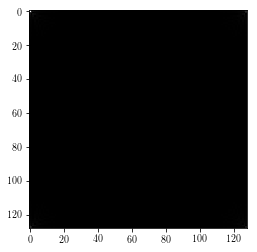

In [5]:
plt.imshow(abs(fft2(circle)), cmap='gray')

4. Now apply fftshift() on the image and again observe the output. Is the FT you observe consistent with the analytical fourier transform of a circle?

#### The 2D Fourier transform of a circular aperture is given by a Bessel function of the first kind. Most of the energy falls in the central region

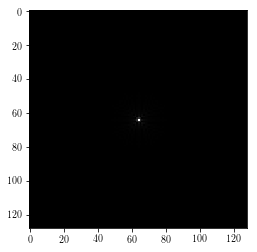

In [6]:
plt.imshow(fftshift(abs(fft2(circle))), cmap='gray')

5. Apply fft2() again on the fft2 output FIgray and display the intensity image. Alternatively, you can apply fft2 on the image I twice. Explain what you observe.

#### Applying the FT twice reproduces the original image.

#### From Wikipedia: "Denoting the Fourier transform operator by F, so F( f ) := f̂, then for suitable functions, applying the Fourier transform twice simply flips the function: $F^2$( f )(x) = f (−x), which can be interpreted as 'reversing time'."

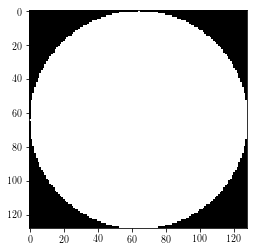

In [7]:
plt.imshow(abs(fft2(fft2(circle))), cmap='gray')

6. Perform steps 2 to 5 for a 128x128 image of a letter “A” and explain what you observe.

In [8]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

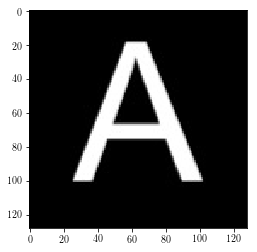

In [9]:
a = rgb2gray(plt.imread('a_gray.jpg'))    
plt.imshow(a, cmap = 'gray')
plt.show()

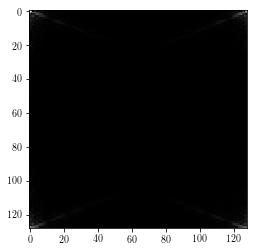

In [10]:
plt.imshow(abs(fft2(a)), cmap='gray')

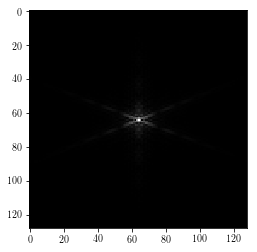

In [11]:
plt.imshow(fftshift(abs(fft2(a))), cmap='gray')

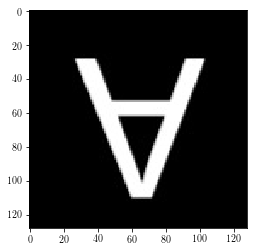

In [12]:
plt.imshow(abs(fft2(fft2(a))), cmap='gray')

#### The original image is now inverted. The "time-reversal" caused by applying FT on the image twice is more evident here.

7. To convince yourself that the FT of a function is complex, display
separately, the real and imaginary parts of the circle and the “A” image.

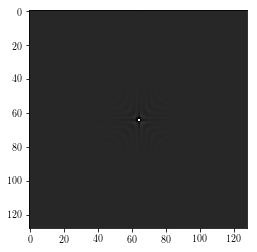

In [13]:
plt.imshow(fftshift(np.real(fft2(circle))), cmap='gray')

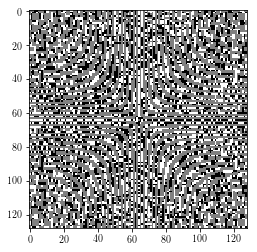

In [14]:
plt.imshow(fftshift(np.angle(fft2(circle))), cmap='gray')

plt.imshow(fftshift(np.real(fft2(a))), cmap='gray')

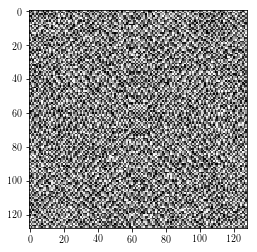

In [15]:
plt.imshow(fftshift(np.angle(fft2(a))), cmap='gray')

8. Apply FT to the following patterns
    1. Sinusoid along x (corrugated roof)
    2. Simulated double slit
    3. Square function
    4. 2D Gaussian bell curve

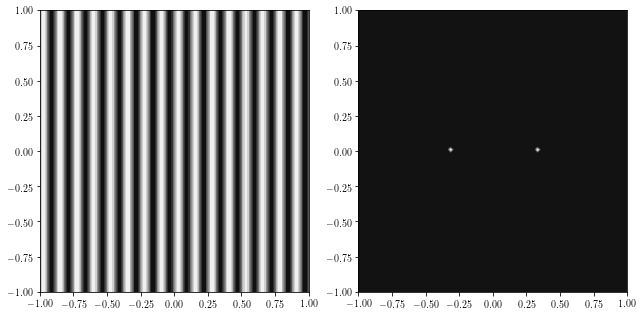

In [16]:
nx, ny = (100, 100)
x = np.linspace(-1, 1, nx)
y = np.linspace(-1, 1, ny)
X, Y = np.meshgrid(x, y)
f = 50
z = np.sin(f*X)

plt.figure(figsize=(9,4.5))
plt.subplot(1, 2, 1)
plt.contourf(x,y,z)
plt.gray()

plt.subplot(1, 2, 2)
plt.contourf(x,y,fftshift(abs(fft2(z))))
plt.gray()

plt.tight_layout()
plt.show()

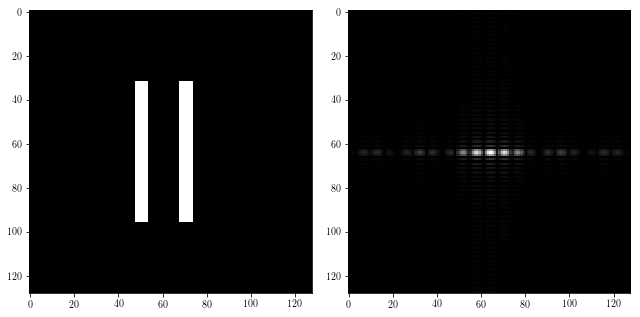

In [17]:
double_slit = rgb2gray(plt.imread('double_slit.png'))    

plt.figure(figsize=(9,4.5))
plt.subplot(1, 2, 1)
imshow(double_slit)

plt.subplot(1, 2, 2)
imshow(fftshift(abs(fft2(double_slit))))

plt.tight_layout()
plt.show()

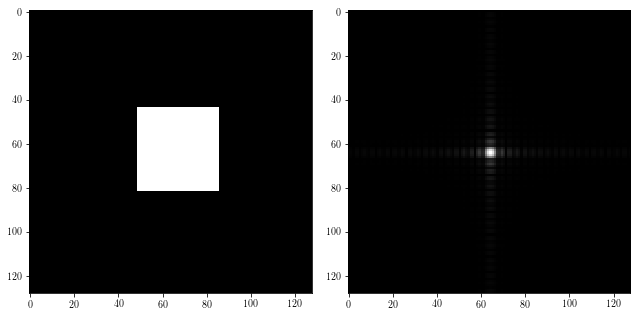

In [18]:
sq_ape = rgb2gray(plt.imread('sq_ape.png'))    

plt.figure(figsize=(9,4.5))
plt.subplot(1, 2, 1)
imshow(sq_ape)

plt.subplot(1, 2, 2)
imshow(fftshift(abs(fft2(sq_ape))))

plt.tight_layout()
plt.show()

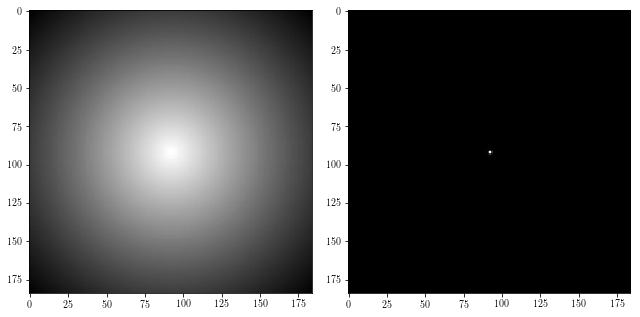

In [19]:
gaussbell = rgb2gray(plt.imread('gaussbell.png'))    
#gaussbell taken from https://barteezy.wordpress.com/2015/09/19/activity-5-fourier-transform-model-of-image-formati/
plt.figure(figsize=(9,4.5))
plt.subplot(1, 2, 1)
imshow(gaussbell)

plt.subplot(1, 2, 2)
imshow(fftshift(abs(fft2(gaussbell))))

plt.tight_layout()
plt.show()

# Activity 2. Simulation of an imaging device.

1. Create a 128x128 image of the letters “VIP” using Paint (Arial font recommended). Let the letters fill 50% of the space. This represents your object. Note that the edges of a sans serif font are sharp.

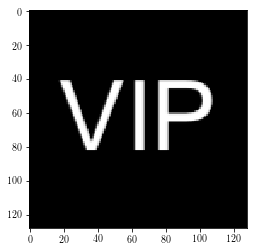

In [20]:
vip = rgb2gray(plt.imread('vip.png'))    
plt.imshow(vip, cmap = 'gray')

2. Create another 128x128 image of a white circle (centered) against a black background. This image represents the “aperture” of a circular lens.

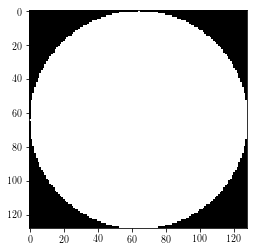

In [21]:
ape = make_circle(2)
plt.imshow(ape, cmap='gray')

3. Open both images in Scilab as grayscale images, get the 2D FFT of the VIP image and fftshift the aperture image.

In [22]:
Fvip = fft2(vip)
Fape = fftshift(ape)

4. Get the product of their FFT as in Equation (4) and get the inverse to get the convolved image. Display the output.

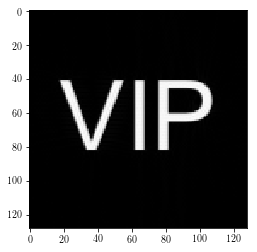

In [23]:
Fprod = Fvip * Fape
plt.imshow(abs(ifft2(Fprod)), cmap='gray')

5. Compare the original “VIP” and the “imaged” “VIP” for different radii of the white circle. Discuss the effect of the aperture of the lens on the quality of the image.

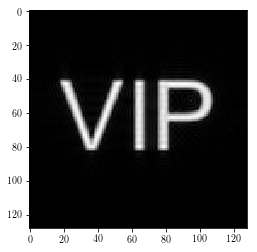

In [24]:
ape_4 = make_circle(4)
plt.imshow(ape_4, cmap='gray')
Fvip = fft2(vip)
Fape = fftshift(ape_4)
Fprod = Fvip * Fape
plt.imshow(abs(ifft2(Fprod)), cmap='gray')

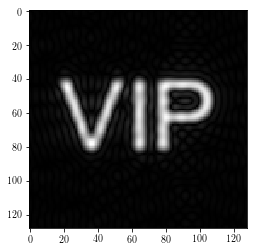

In [25]:
ape_8 = make_circle(8)
plt.imshow(ape_8, cmap='gray')
Fvip = fft2(vip)
Fape = fftshift(ape_8)
Fprod = Fvip * Fape
plt.imshow(abs(ifft2(Fprod)), cmap='gray')

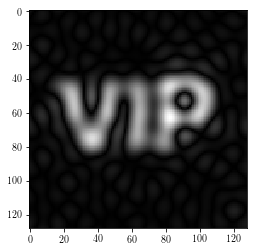

In [26]:
ape_16 = make_circle(16)
plt.imshow(ape_16, cmap='gray')
Fvip = fft2(vip)
Fape = fftshift(ape_16)
Fprod = Fvip * Fape
plt.imshow(abs(ifft2(Fprod)), cmap='gray')

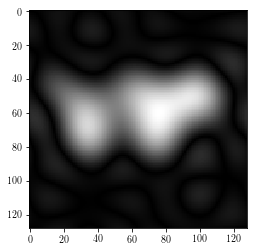

In [27]:
ape_32 = make_circle(32)
plt.imshow(ape_4, cmap='gray')
Fvip = fft2(vip)
Fape = fftshift(ape_32)
Fprod = Fvip * Fape
plt.imshow(abs(ifft2(Fprod)), cmap='gray')

#### As the aperture decreases, the output image becomes more distorted as a product of convolution. In terms of imaging systems, a finite lens radius means the lens can only gather a limited number of rays reflected off an object adn therefore reconstruction of the image is never perfect.

# Activity 3. Template Matching using correlation

1. Type the following text in a 128x128 white background using Paint “THE RAIN IN SPAIN STAYS MAINLY IN THE PLAIN.”

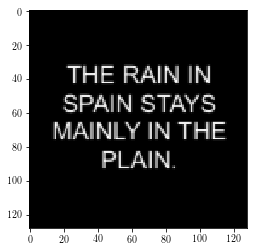

In [28]:
rain = 1-rgb2gray(plt.imread('rain.png'))    
plt.imshow(rain, cmap = 'gray')

2. Create a 128x128 image of the letter “A” using the same font and font size as the image in step 1.

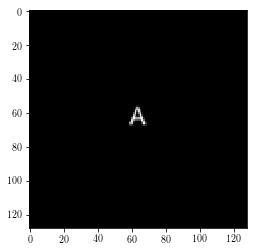

In [29]:
a_rain = 1-rgb2gray(plt.imread('a_rain.png'))    
plt.imshow(a_rain, cmap = 'gray')

3. Open both images in Scilab as grayscale and get both their Fourier Transforms.

In [30]:
Frain = fft2(rain)
Fa_rain = fft2(a_rain)

4. Element-per element multiply the FT of A and the conjugate of the FT of the text image. Use conj() to get complex conjugate.

In [31]:
Fprod = np.conj(Frain) * Fa_rain

5. Compute the inverse FFT and display the output. Explain the meaning of the output you obtain.

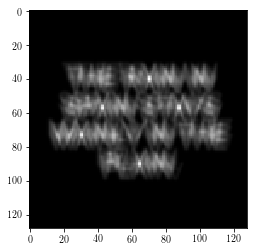

In [32]:
plt.imshow(fftshift(abs(fft2(Fprod))), cmap='gray')

#### Template matching and pattern recognition are techniques that make use of the correlation algorithm presented above. There are prominent dots that can be seen in the output image, which indicate positions of high correlation. That is, the dots map where the letter "A" appears on text image.

# Activity 4. Edge detection using the convolution integral

1. Create a 3x3 matrix pattern of an edge such that the total sum is zero.

In [33]:
pattern = [[-1,-1,-1],[2, 2, 2], [-1, -1, -1]]

2. Convolve this image with the VIP image.

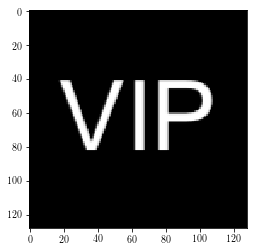

In [34]:
vip = rgb2gray(plt.imread('vip.png'))    
plt.imshow(vip, cmap = 'gray')

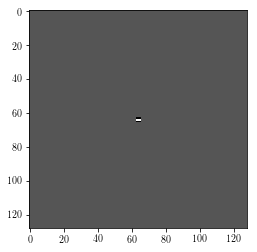

In [35]:
d = np.zeros((128, 128))
d_patt = np.array(pattern)
r, c = 63, 63
d[r:r+d_patt.shape[0], c:c+d_patt.shape[1]] += d_patt
plt.imshow(d, cmap = 'gray')

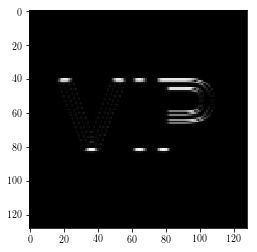

In [36]:
Fvip = fft2(vip)
Fape = fft2(d)
Fprod = abs(fft2(np.conj(Fvip) * Fape))
plt.imshow(fftshift(Fprod), cmap='gray')

#### Horizontal edges are preserved well for a horizontal matrix.

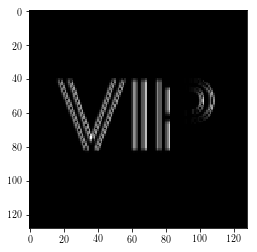

In [37]:
pattern = [[-1,2,-1],[-1, 2, -1], [-1, 2, -1]]
d = np.zeros((128, 128))
d_patt = np.array(pattern)
r, c = 63, 63
d[r:r+d_patt.shape[0], c:c+d_patt.shape[1]] += d_patt
#plt.imshow(d, cmap = 'gray')
Fvip = fft2(vip)
Fape = fft2(d)
Fprod = abs(fft2(np.conj(Fvip) * Fape))
plt.imshow(fftshift(Fprod), cmap='gray')

#### Vertical  edges are preserved well for a vertical matrix.

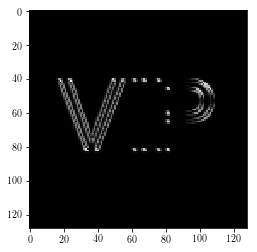

In [38]:
pattern = [[2,-1,-1],[-1, 2, -1], [-1, -1, 2]]
d = np.zeros((128, 128))
d_patt = np.array(pattern)
r, c = 63, 63
d[r:r+d_patt.shape[0], c:c+d_patt.shape[1]] += d_patt
#plt.imshow(d, cmap = 'gray')
Fvip = fft2(vip)
Fape = fft2(d)
Fprod = abs(fft2(np.conj(Fvip) * Fape))
plt.imshow(fftshift(Fprod), cmap='gray')

#### Diagonal edges are preserved well for a diagonal matrix.

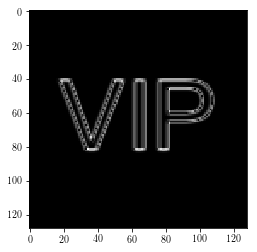

In [39]:
pattern = [[-1,-1,-1],[-1, 8, -1], [-1, -1, -1]]
d = np.zeros((128, 128))
d_patt = np.array(pattern)
r, c = 63, 63
d[r:r+d_patt.shape[0], c:c+d_patt.shape[1]] += d_patt
#plt.imshow(d, cmap = 'gray')
Fvip = fft2(vip)
Fape = fft2(d)
Fprod = abs(fft2(np.conj(Fvip) * Fape))
plt.imshow(fftshift(Fprod), cmap='gray')

#### All edges are preserved well for a spot matrix.

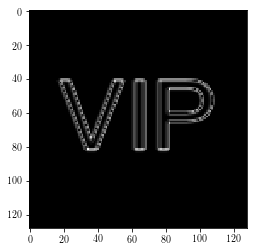

In [40]:
pattern = [[0,-1,0],[-1, 4, -1], [0,-1,0]]
d = np.zeros((128, 128))
d_patt = np.array(pattern)
r, c = 63, 63
d[r:r+d_patt.shape[0], c:c+d_patt.shape[1]] += d_patt
#plt.imshow(d, cmap = 'gray')
Fvip = fft2(vip)
Fape = fft2(d)
Fprod = abs(fft2(np.conj(Fvip) * Fape))
plt.imshow(fftshift(Fprod), cmap='gray')

#### All edges are preserved well for a cross matrix.

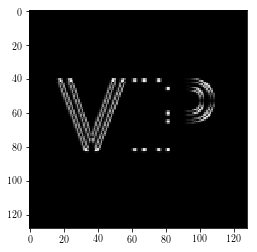

In [41]:
pattern = [[1,0,-1],[0,0,0], [-1,0,1]]
d = np.zeros((128, 128))
d_patt = np.array(pattern)
r, c = 63, 63
d[r:r+d_patt.shape[0], c:c+d_patt.shape[1]] += d_patt
#plt.imshow(d, cmap = 'gray')
Fvip = fft2(vip)
Fape = fft2(d)
Fprod = abs(fft2(np.conj(Fvip) * Fape))
plt.imshow(fftshift(Fprod), cmap='gray')

#### Corners are preserved well for corner matrices. The "more corner" the spot is, the higher the instensity it displays.